In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["font.family"] = "serif"
from scipy.optimize import curve_fit
from scipy.stats import chi2

Como Z = X + jY

La magnitud de la impedancia total se obtiene como |Z|= $\sqrt{X^2+Y^2}$

Ademas $\theta$ = $arctan(Y/X)$

In [ ]:
# Primero podemos confirmar que theta = arctan(Y/X)
def cargar_datos_csv(archivo):
    data = pd.read_csv(archivo, skiprows=1, delimiter=",", decimal=".", header=None)
    freq = np.asarray(data[0]) #generador
    X = np.asarray(data[1]) #lock in
    Y = np.asarray(data[2])
    R = np.asarray(data[3])
    theta = np.asarray(data[4])
    return freq,X,Y,R,theta


#medicion lockin 1


In [ ]:
freq,X,Y,R,theta = cargar_datos_csv('medicion_lockin.csv')


### fase

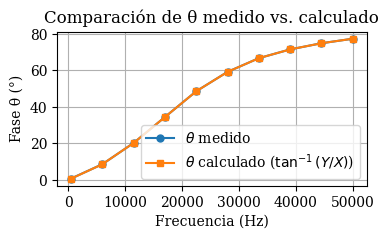

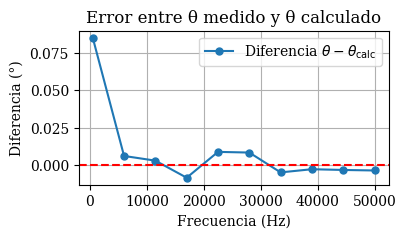

In [ ]:
theta_calculado = np.degrees(np.arctan2(Y, X))

plt.figure(figsize=(4,2))
plt.plot(freq, theta, 'o-', label=r'$\theta$ medido', markersize=5)
plt.plot(freq, theta_calculado, 's-', label=r'$\theta$ calculado ($\tan^{-1}(Y/X)$)', markersize=5)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase θ (°)")
plt.title("Comparación de θ medido vs. calculado")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(4,2))
plt.plot(freq, theta - theta_calculado, 'o-', label=r'Diferencia $\theta - \theta_{\text{calc}}$', markersize=5)
plt.axhline(0, color='r', linestyle='--')  # Línea de referencia en 0
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Diferencia (°)")
plt.title("Error entre θ medido y θ calculado")
plt.legend()
plt.grid(True)
plt.show()

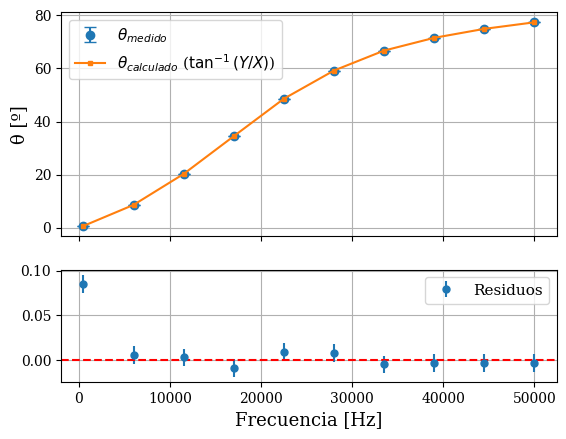

<Figure size 400x200 with 0 Axes>

In [ ]:
theta_calculado = np.degrees(np.arctan2(Y, X))

fig, ax = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios': [6, 3]})

ax[0].errorbar(freq, theta,yerr = 0.01,  fmt = 'o', label=r'$\theta_{medido}$', markersize=6, capsize = 4)
ax[0].errorbar(freq, theta_calculado, fmt = 's-', label=r'$\theta_{calculado}$ ($\tan^{-1}(Y/X)$)', markersize=3)
ax[0].set_ylabel("θ [º]", fontsize= 13)
# ax.title("Comparación de θ medido vs. calculado")

plt.figure(figsize=(4,2))
ax[1].errorbar(freq, theta - theta_calculado, yerr = 0.01, fmt ='o', label=r'Residuos', markersize=5)
ax[1].axhline(0, color='r', linestyle='--')  # Línea de referencia en 0
ax[1].set_xlabel("Frecuencia [Hz]", fontsize = 13)
ax[1].set_ylabel("", fontsize = 13)
# ax[1].title("Error entre θ medido y θ calculado")

ax[0].legend(fontsize = 11)
ax[0].grid(True)
ax[1].legend(fontsize = 11)
ax[1].grid(True)

X e Y

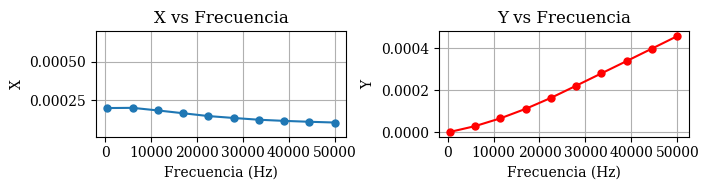

In [ ]:
# vemos como X e Y varian con la frecuencia
fig, axes = plt.subplots(1, 2, figsize=(7, 2))

axes[0].plot(freq, X, 'o-', label=r'$X$', markersize=5)
axes[0].set_xlabel("Frecuencia (Hz)")
axes[0].set_ylabel("X")
axes[0].set_ylim(0.000010, 0.000700)
axes[0].set_title("X vs Frecuencia")
axes[0].grid(True)

axes[1].plot(freq, Y, 'o-', label=r'$Y$', markersize=5, color='r')
axes[1].set_xlabel("Frecuencia (Hz)")
axes[1].set_ylabel("Y")
axes[1].set_title("Y vs Frecuencia")
axes[1].grid(True)

plt.tight_layout()
plt.show()

###Impedancia

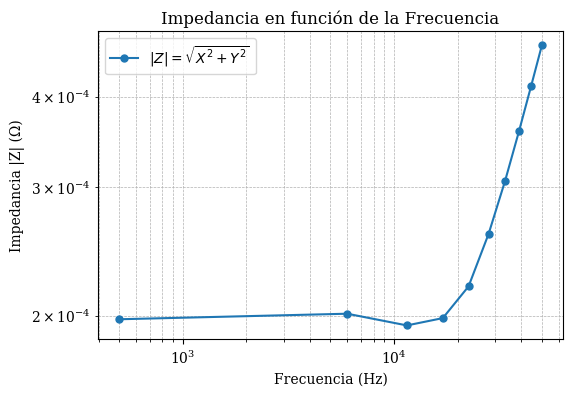

In [ ]:
# ahora si calculamos |Z| como |Z|= $\sqrt{X^2+Y^2}$
Z_calculado = np.sqrt(X**2 + Y**2)

plt.figure(figsize=(6,4))
plt.plot(freq, Z_calculado, 'o-', label=r'$|Z| = \sqrt{X^2 + Y^2}$', markersize=5)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Impedancia |Z| (Ω)")
plt.title("Impedancia en función de la Frecuencia")
plt.xscale("log")
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

###Qué esperamos ver?
Si la impedancia es mayormente resistiva, Z debería ser relativamente constante en frecuencias bajas

Si hay inductancias entonces Z deberia aumentar con la frecuencia como Z = wL

Si hay capacitancia deberia verse una caida de Z a frecuencias altas

### Inductancia

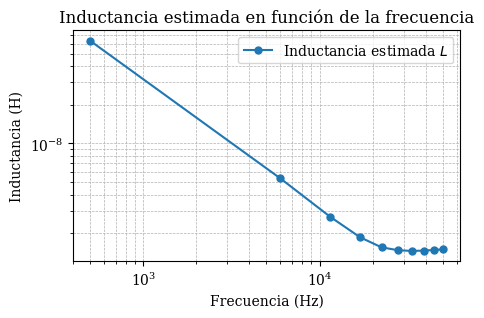

In [ ]:
# tambien podemos calcular la inductancia del cable sabiendo que Z ~ ωL (sin tener en cuenta R, ya que Z^2 >>> R^2)

L_estimado = Z_calculado / (2 * np.pi * freq)

plt.figure(figsize=(5,3))
plt.plot(freq, L_estimado, 'o-', label=r'Inductancia estimada $L$', markersize=5)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Inductancia (H)")
plt.title("Inductancia estimada en función de la frecuencia")
plt.xscale("log")
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

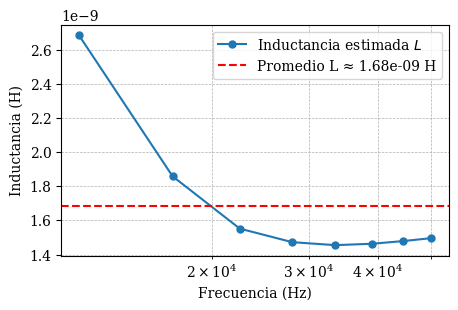

L promedio en la región inductiva: 1.68e-09 H


In [ ]:
# en la region inductiva >10^4 Hz

region_inductiva = freq > 1e4
freq_inductiva = freq[region_inductiva]
Z_inductiva = Z_calculado[region_inductiva]

# calculo la inductancia en la región inductiva
L_inductiva = Z_inductiva / (2 * np.pi * freq_inductiva)

plt.figure(figsize=(5, 3))
plt.plot(freq_inductiva, L_inductiva, 'o-', label=r'Inductancia estimada $L$', markersize=5)
plt.axhline(np.mean(L_inductiva), color='r', linestyle='--', label=f'Promedio L ≈ {np.mean(L_inductiva):.2e} H')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Inductancia (H)")
plt.xscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

print(f"L promedio en la región inductiva: {np.mean(L_inductiva):.2e} H")

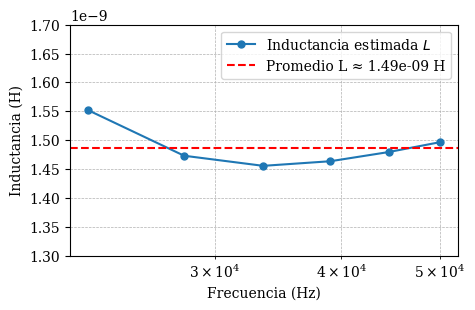

L promedio en la región inductiva: 1.49e-09 H


In [ ]:
# acotamos un poco mas la region  -> se ve que varia mucho pero es por la escala, en general es relativamente constante

region_inductiva = freq > 2*10**4
freq_inductiva = freq[region_inductiva]
Z_inductiva = Z_calculado[region_inductiva]

# calculo la inductancia en la región inductiva
L_inductiva = Z_inductiva / (2 * np.pi * freq_inductiva)

plt.figure(figsize=(5, 3))
plt.plot(freq_inductiva, L_inductiva, 'o-', label=r'Inductancia estimada $L$', markersize=5)
plt.axhline(np.mean(L_inductiva), color='r', linestyle='--', label=f'Promedio L ≈ {np.mean(L_inductiva):.2e} H')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Inductancia (H)")
plt.xscale("log")
plt.ylim(1.3e-9, 1.7e-9)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

print(f"L promedio en la región inductiva: {np.mean(L_inductiva):.2e} H")

In [ ]:
print(1e4)

10000.0


#### Ahora teniendo en cuenta R en  Z=R+iwL  (por si acaso)

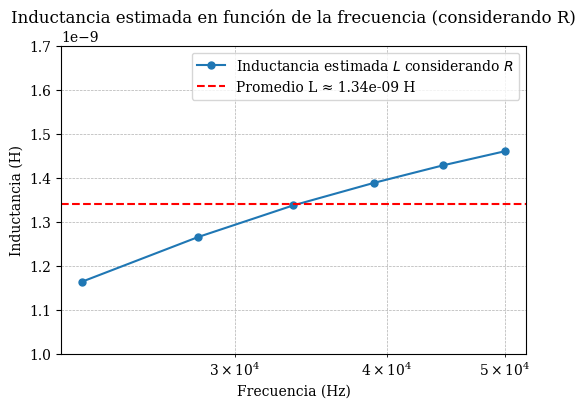

Inductancia promedio en la región inductiva (considerando R): 1.34e-09 H


In [ ]:
region_inductiva = freq > 2*10**4
freq_inductiva = freq[region_inductiva]
Z_inductiva = Z_calculado[region_inductiva]
R_inductiva = X[region_inductiva] # aca estoy asumiendo que Resist ~ X

omega_inductiva = 2 * np.pi * freq_inductiva
L_inductiva_con_R = np.sqrt(Z_inductiva**2 - R_inductiva**2) / omega_inductiva

plt.figure(figsize=(6, 4))
plt.plot(freq_inductiva, L_inductiva_con_R, 'o-', label=r'Inductancia estimada $L$ considerando $R$', markersize=5)
plt.axhline(np.mean(L_inductiva_con_R), color='r', linestyle='--', label=f'Promedio L ≈ {np.mean(L_inductiva_con_R):.2e} H')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Inductancia (H)")
plt.title("Inductancia estimada en función de la frecuencia (considerando R)")
plt.xscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.ylim(1e-9, 1.7e-9)
plt.legend()
plt.show()

print(f"Inductancia promedio en la región inductiva (considerando R): {np.mean(L_inductiva_con_R):.2e} H")

# medicion lockin 2

In [ ]:
freq2,X2,Y2,R2,theta2 = cargar_datos_csv('medicion_lockin2.csv')
freq2,X2,Y2,R2,theta2

(array([  500.,  6000., 11500., 17000., 22500., 28000., 33500., 39000.,
        44500., 50000.]),
 array([0.00020269, 0.00019245, 0.00017589, 0.00015789, 0.00014013,
        0.00012782, 0.00011826, 0.00011072, 0.00010493, 0.00010073]),
 array([1.31131e-06, 3.06147e-05, 6.84191e-05, 1.14322e-04, 1.66685e-04,
        2.25008e-04, 2.83213e-04, 3.42192e-04, 4.01380e-04, 4.60388e-04]),
 array([0.00020245, 0.00019492, 0.00018873, 0.00019494, 0.00021777,
        0.00025877, 0.00030691, 0.00035969, 0.00041488, 0.00047127]),
 array([ 0.588,  9.036, 21.246, 35.904, 49.938, 60.402, 67.332, 72.072,
        75.348, 77.658]))

### vemos si la fase está ok

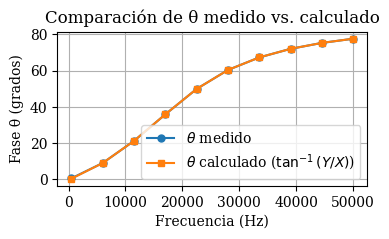

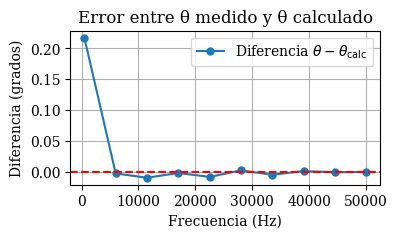

In [ ]:
theta_calculado2 = np.degrees(np.arctan2(Y2, X2))

plt.figure(figsize=(4,2))
plt.plot(freq2, theta2, 'o-', label=r'$\theta$ medido', markersize=5)
plt.plot(freq2, theta_calculado2, 's-', label=r'$\theta$ calculado ($\tan^{-1}(Y/X)$)', markersize=5)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase θ (grados)")
plt.title("Comparación de θ medido vs. calculado")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(4,2))
plt.plot(freq2, theta2 - theta_calculado2, 'o-', label=r'Diferencia $\theta - \theta_{\text{calc}}$', markersize=5)
plt.axhline(0, color='r', linestyle='--')  # Línea de referencia en 0
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Diferencia (grados)")
plt.title("Error entre θ medido y θ calculado")
plt.legend()
plt.grid(True)
plt.show()

### vemos como varían X e Y

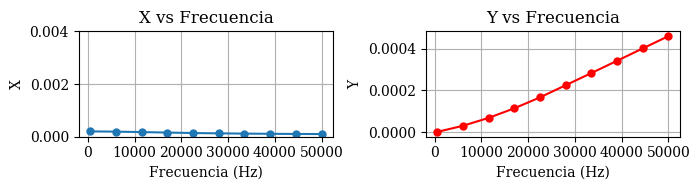

In [ ]:
# vemos como X e Y varian con la frecuencia
fig, axes = plt.subplots(1, 2, figsize=(7, 2))

axes[0].plot(freq2, X2, 'o-', label=r'$X$', markersize=5)
axes[0].set_xlabel("Frecuencia (Hz)")
axes[0].set_ylabel("X")
axes[0].set_ylim(0.0000, 0.004000)
axes[0].set_title("X vs Frecuencia")
axes[0].grid(True)

axes[1].plot(freq2, Y2, 'o-', label=r'$Y$', markersize=5, color='r')
axes[1].set_xlabel("Frecuencia (Hz)")
axes[1].set_ylabel("Y")
axes[1].set_title("Y vs Frecuencia")
axes[1].grid(True)

plt.tight_layout()
plt.show()

### impedancia |Z|

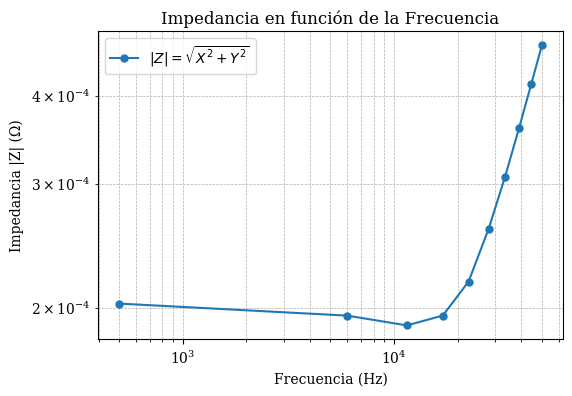

In [ ]:
# ahora si calculamos |Z| como |Z|= $\sqrt{X^2+Y^2}$
Z_calculado2 = np.sqrt(X2**2 + Y2**2)

plt.figure(figsize=(6,4))
plt.plot(freq2, Z_calculado2, 'o-', label=r'$|Z| = \sqrt{X^2 + Y^2}$', markersize=5)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Impedancia |Z| (Ω)")
plt.title("Impedancia en función de la Frecuencia")
plt.xscale("log")
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

### inductancia

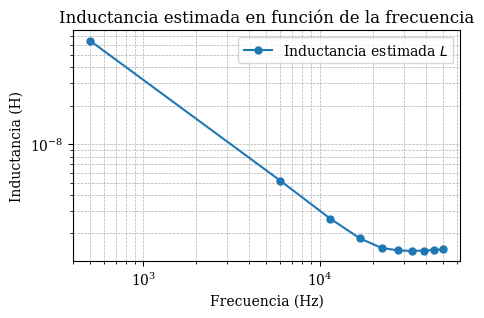

In [ ]:
L_estimado2 = Z_calculado2 / (2 * np.pi * freq2)

plt.figure(figsize=(5,3))
plt.plot(freq2, L_estimado2, 'o-', label=r'Inductancia estimada $L$', markersize=5)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Inductancia (H)")
plt.title("Inductancia estimada en función de la frecuencia")
plt.xscale("log")
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

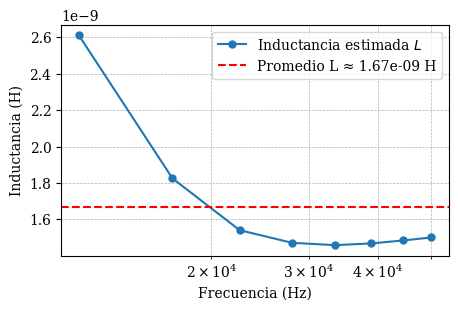

L promedio en la región inductiva: 1.67e-09 H


In [ ]:
# en la region inductiva >10^4 Hz

region_inductiva2 = freq2 > 1e4
freq_inductiva2 = freq2[region_inductiva2]
Z_inductiva2 = Z_calculado2[region_inductiva2]

# calculo la inductancia en la región inductiva
L_inductiva2 = Z_inductiva2 / (2 * np.pi * freq_inductiva2)

plt.figure(figsize=(5, 3))
plt.plot(freq_inductiva2, L_inductiva2, 'o-', label=r'Inductancia estimada $L$', markersize=5)
plt.axhline(np.mean(L_inductiva2), color='r', linestyle='--', label=f'Promedio L ≈ {np.mean(L_inductiva2):.2e} H')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Inductancia (H)")
plt.xscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

print(f"L promedio en la región inductiva: {np.mean(L_inductiva2):.2e} H")

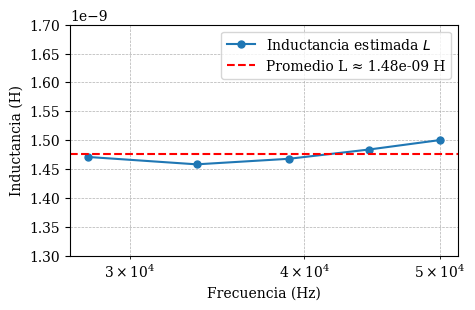

L promedio en la región inductiva: 1.48e-09 H


In [ ]:
region_inductiva2 = freq2 > 2.5*10**4
freq_inductiva2 = freq2[region_inductiva2]
Z_inductiva2 = Z_calculado2[region_inductiva2]

# calculo la inductancia en la región inductiva
L_inductiva2 = Z_inductiva2 / (2 * np.pi * freq_inductiva2)

plt.figure(figsize=(5, 3))
plt.plot(freq_inductiva2, L_inductiva2, 'o-', label=r'Inductancia estimada $L$', markersize=5)
plt.axhline(np.mean(L_inductiva2), color='r', linestyle='--', label=f'Promedio L ≈ {np.mean(L_inductiva2):.2e} H')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Inductancia (H)")
plt.xscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.ylim(1.3e-9, 1.7e-9)
plt.legend()
plt.show()

print(f"L promedio en la región inductiva: {np.mean(L_inductiva2):.2e} H")

# medicion lockin 3


In [ ]:
freq3,X3,Y3,R3,theta3 = cargar_datos_csv('medicion_lockin3.csv')


### impedancia

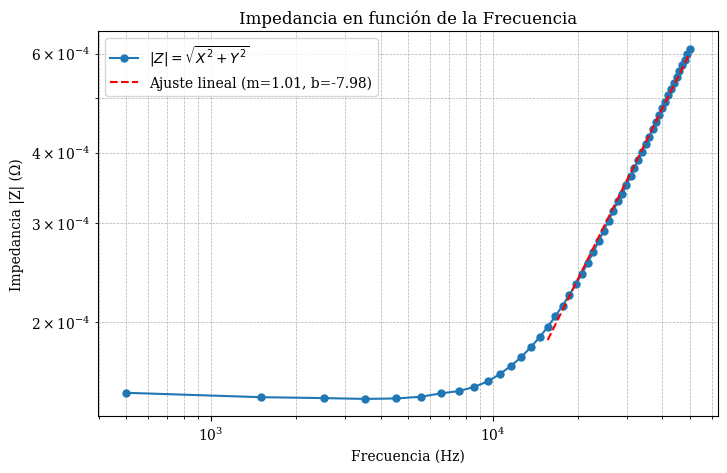

Inductancia estimada: L = 1.68e-09 H


In [ ]:
Z_calculado3 = np.sqrt(X3**2 + Y3**2)

frecuencia_alta = freq3[freq3 > 1.5e4]
Z_alta = Z_calculado3[freq3 > 1.5e4]

log_f = np.log10(frecuencia_alta)
log_Z = np.log10(Z_alta)

def modelo_lineal(x, m, b):
    return m * x + b

params, cov = curve_fit(modelo_lineal, log_f, log_Z)

m_ajustado, b_ajustado = params

log_Z_ajustado = modelo_lineal(log_f, m_ajustado, b_ajustado)

plt.figure(figsize=(8, 5))
plt.plot(freq3, Z_calculado3, 'o-', label=r'$|Z| = \sqrt{X^2 + Y^2}$', markersize=5)
plt.plot(frecuencia_alta, 10**log_Z_ajustado, 'r--',
         label=f"Ajuste lineal (m={m_ajustado:.2f}, b={b_ajustado:.2f})")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Impedancia |Z| (Ω)")
plt.title("Impedancia en función de la Frecuencia")
plt.xscale("log")
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

L_calculado = 10**b_ajustado / (2 * np.pi)
print(f"Inductancia estimada: L = {L_calculado:.2e} H")

### inductancia

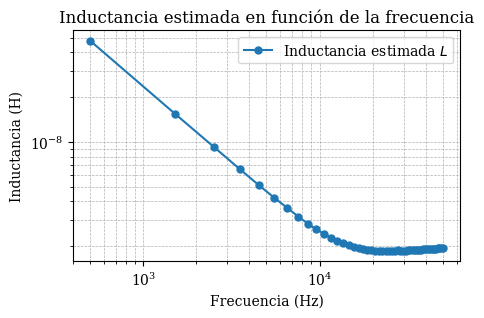

In [ ]:
L_estimado3 = Z_calculado3 / (2 * np.pi * freq3)

plt.figure(figsize=(5,3))
plt.plot(freq3, L_estimado3, 'o-', label=r'Inductancia estimada $L$', markersize=5)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Inductancia (H)")
plt.title("Inductancia estimada en función de la frecuencia")
plt.xscale("log")
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

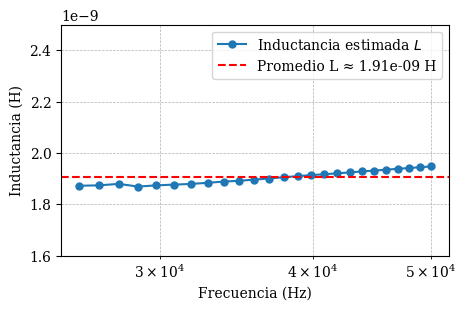

L promedio en la región inductiva: 1.91e-09 H


In [ ]:
region_inductiva3 = freq3 > 2.5*10**4
freq_inductiva3 = freq3[region_inductiva3]
Z_inductiva3 = Z_calculado3[region_inductiva3]

# calculo la inductancia en la región inductiva
L_inductiva3 = Z_inductiva3 / (2 * np.pi * freq_inductiva3)

plt.figure(figsize=(5, 3))
plt.plot(freq_inductiva3, L_inductiva3, 'o-', label=r'Inductancia estimada $L$', markersize=5)
plt.axhline(np.mean(L_inductiva3), color='r', linestyle='--', label=f'Promedio L ≈ {np.mean(L_inductiva3):.2e} H')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Inductancia (H)")
plt.xscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.ylim(1.6e-9, 2.5e-9)
plt.legend()
plt.show()

print(f"L promedio en la región inductiva: {np.mean(L_inductiva3):.2e} H")

Error total: 3.12e-07 H
L promedio en la región inductiva: 1.324e-05 H


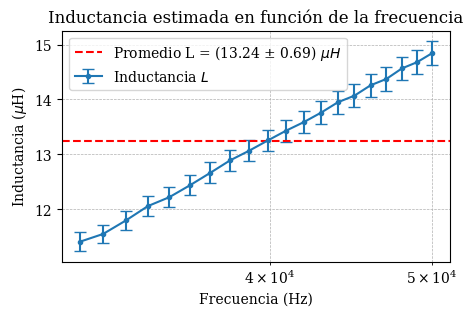

In [ ]:
region_inductiva3 = freq3 > 3*10**4
freq_inductiva3 = freq3[region_inductiva3]
Y3_inductiva = Y3[region_inductiva3]
X3_inductiva = X3[region_inductiva3]

# calculo la inductancia en la región inductiva
L_inductiva = (Y3_inductiva * 0.559)/(X3_inductiva*2*np.pi*freq_inductiva3)

delta_Y = 0.01
delta_X = 0.01
delta_f = 25/(10**6)
delta_R = 0.0026

errorL = []

for i in range(len(L_inductiva)):
    omega = 2 * np.pi * freq_inductiva3[i]
    term1 = (Y3_inductiva[i] / (omega * X3_inductiva[i])) * delta_R
    term2 = (0.559 / (omega * X3_inductiva[i])) * (delta_Y*Y3_inductiva[i]) #termino asociado a error de Y
    term3 = (0.559 * Y3_inductiva[i] / (omega * X3_inductiva[i]**2)) * (delta_X*X3_inductiva[i])#termino asociado a error deX
    term4 = (0.559 * Y3_inductiva[i] / (2 * np.pi * freq_inductiva3[i]**2 * X3_inductiva[i])) * (delta_f*freq_inductiva3[i]+(30*(10**(-6))))#termino asociado a error de f
    errorL.append(np.sqrt(term1**2 + term2**2 + term3**2 + term4**2))

# Caso 1: Error estándar de la media (para errores aleatorios)
sigma = np.std(L_inductiva, ddof=1)  # Desviación estándar muestral
error_mean_A = sigma / np.sqrt(len(L_inductiva))

# Caso 2: Promedio de los errores individuales (para errores sistemáticos)
error_mean_B = np.mean(errorL)

error_total_media = np.sqrt(error_mean_A**2 + error_mean_B**2)
print(f"Error total: {error_total_media:.2e} H")

print(f"L promedio en la región inductiva: {np.mean(L_inductiva):.3e} H")

plt.figure(figsize=(5, 3))
plt.errorbar(freq_inductiva3, L_inductiva*10**6, yerr = np.array(errorL)*10**6, fmt = 'o-', markersize=3, capsize = 4, label=r'Inductancia $L$')
#plt.axhline(np.mean(L_inductiva), color='r', linestyle='--', label=f'Promedio L ≈ {np.mean(L_inductiva):.2e} H')
plt.axhline(np.mean(L_inductiva)*10**6, color='r', linestyle='--', label=f'Promedio L = (13.24 ± 0.69) $\mu H$')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Inductancia ($\mu$H)")
plt.title("Inductancia estimada en función de la frecuencia")
plt.xscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


### Con núcleo

In [ ]:
freq4,X4,Y4,R4,theta4 = cargar_datos_csv('medicion_lockin-nucleo-con-metal.csv')


Error total: 1.67e-07 H
L promedio en la región inductiva: 5.1357e-06 H


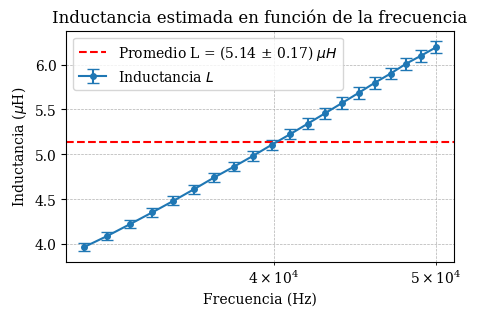

In [ ]:
region_inductiva4 = freq4 > 3*10**4
freq_inductiva4 = freq4[region_inductiva4]
Y4_inductiva = Y4[region_inductiva4]
X4_inductiva = X4[region_inductiva4]

# calculo la inductancia en la región inductiva
L_inductiva = (Y4_inductiva * 0.559)/(X4_inductiva*2*np.pi*freq_inductiva4)

delta_Y = 0.01
delta_X = 0.01
delta_f = 25/(10**6)
delta_R = 0.0026

errorL = []

for i in range(len(L_inductiva)):
    omega = 2 * np.pi * freq_inductiva4[i]
    term1 = (Y4_inductiva[i] / (omega * X4_inductiva[i])) * delta_R
    term2 = (0.559 / (omega * X4_inductiva[i])) * (delta_Y*Y4_inductiva[i]) #termino asociado a error de Y
    term4 = (0.559 * Y4_inductiva[i] / (omega * X4_inductiva[i]**2)) * (delta_X*X4_inductiva[i])#termino asociado a error deX
    term4 = (0.559 * Y4_inductiva[i] / (2 * np.pi * freq_inductiva4[i]**2 * X4_inductiva[i])) * (delta_f*freq_inductiva4[i]+(30*(10**(-6))))#termino asociado a error de f
    errorL.append(np.sqrt(term1**2 + term2**2 + term4**2 + term4**2))

# Caso 1: Error estándar de la media (para errores aleatorios)
sigma = np.std(L_inductiva, ddof=1)  # Desviación estándar muestral
error_mean_A = sigma / np.sqrt(len(L_inductiva))

# Caso 2: Promedio de los errores individuales (para errores sistemáticos)
error_mean_B = np.mean(errorL)

error_total_media = np.sqrt(error_mean_A**2 + error_mean_B**2)
print(f"Error total: {error_total_media:.2e} H")

print(f"L promedio en la región inductiva: {np.mean(L_inductiva):.4e} H")

plt.figure(figsize=(5, 3))
plt.errorbar(freq_inductiva4, L_inductiva*10**6, yerr = np.array(errorL)*10**6, fmt = 'o-', markersize=4, capsize = 4, label=r'Inductancia $L$')
#plt.axhline(np.mean(L_inductiva), color='r', linestyle='--', label=f'Promedio L ≈ {np.mean(L_inductiva):.2e} H')
plt.axhline(np.mean(L_inductiva)*10**6, color='r', linestyle='--', label=f'Promedio L = (5.14 ± 0.17) $\mu H$')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Inductancia ($\mu$H)")
plt.title("Inductancia estimada en función de la frecuencia")
plt.xscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


Inductancia L es: L = (5.02659231 ± 0.06162750)uH
Chi-cuadrado (χ²): 0.0072
Grados de libertad (ν): 18
Chi-cuadrado reducido (χ²/ν): 0.0004
p-valor: 1.0000


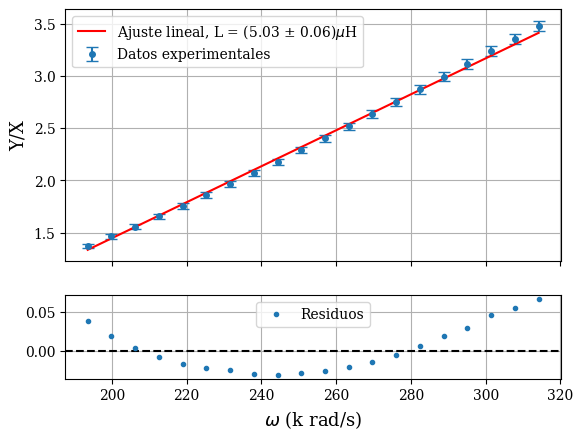

In [ ]:
region_inductiva4 = freq4 > 3*10**4
freq_inductiva4 = freq4[region_inductiva4]
Y4_inductiva = Y4[region_inductiva4]
X4_inductiva = X4[region_inductiva4]

error_X4 = []
error_Y4 = []

for i in range(len(Y4_inductiva)):
    error_X4.append(X4_inductiva[i]*0.01)
    error_Y4.append(Y4_inductiva[i]*0.01)

erroryx = np.sqrt((error_Y4 / X4_inductiva) ** 2 + (Y4_inductiva * error_X4 / X4_inductiva**2) ** 2)#es el error de la variable y, es decir, de Y/X

# Ajuste Y/X = L/R w
def ajuste(w, m, b):
    return m * w + b

popt, pcov = curve_fit(ajuste, freq_inductiva4*2*np.pi, Y4_inductiva / X4_inductiva, sigma=erroryx, absolute_sigma=True, p0=[1.7e-5, 0])
L = popt[0] * 0.2918

error_popt = np.sqrt(pcov[0, 0])  # Incertidumbre en el ajuste

error_L = np.sqrt((0.2918*error_popt)**2 + (popt[0]*0.0013)**2)

#cambio unidades
L = L*10**6
error_L = error_L*10**6
print(f"Inductancia L es: L = ({L:.8f} ± {error_L:.8f})uH")

y_predicho = ajuste(freq_inductiva4*2*np.pi, *popt)
residuos = (Y4_inductiva / X4_inductiva) - y_predicho
# chi2_valor = np.sum((residuos / erroryx) ** 2)
chi2_valor = np.sum((residuos** 2 / y_predicho))
dof = len(freq_inductiva4*2*np.pi) - len(popt)  # Grados de libertad
chi2_reducido = chi2_valor / dof
p_valor = chi2.sf(chi2_valor, dof)

print(f"Chi-cuadrado (χ²): {chi2_valor:.4f}")
print(f"Grados de libertad (ν): {dof}")
print(f"Chi-cuadrado reducido (χ²/ν): {chi2_reducido:.4f}")
print(f"p-valor: {p_valor:.4f}")

fig, ax = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

ax[0].errorbar(freq_inductiva4*2*np.pi/1000, (Y4_inductiva / X4_inductiva), yerr=erroryx, fmt='o', label='Datos experimentales', capsize=4, markersize=4)
ax[0].plot(freq_inductiva4*2*np.pi/1000, y_predicho, 'r-', label=f'Ajuste lineal, L = ({L:.2f} ± {error_L:.2f})$\mu$H')
ax[1].errorbar(freq_inductiva4*2*np.pi/1000, residuos, fmt=".", label="Residuos")
ax[1].axhline(0, color="black", linestyle="--")

ax[1].set_xlabel('$\omega$ (k rad/s)', fontsize=13)
ax[0].set_ylabel('Y/X', fontsize=13)
ax[0].grid(True)
ax[0].legend()
ax[1].grid(True)
ax[1].legend()
plt.show()

Inductancia L es: L = (0.844 ± 0.181)uH
Chi-cuadrado (χ²): 1.5654
Chi-cuadrado reducido (χ²/ν): 0.0580
p-valor: 1.0000


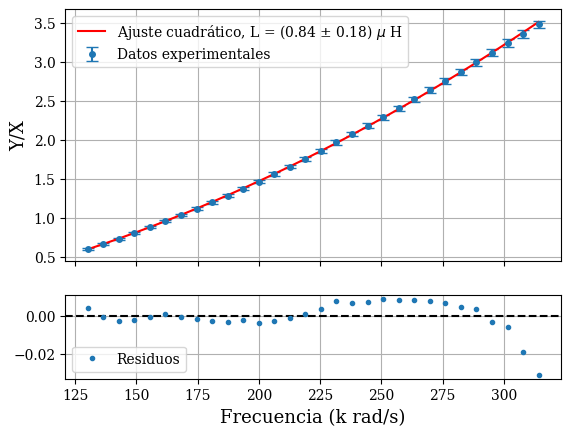

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Filtrado de la región inductiva
region_inductiva4 = freq4 > 2e4  # Ajusta según sea necesario
freq_inductiva4 = freq4[region_inductiva4]
Y4_inductiva = Y4[region_inductiva4]
X4_inductiva = X4[region_inductiva4]

# Cálculo de los errores de X e Y
error_X4 = X4_inductiva * 0.01
error_Y4 = Y4_inductiva * 0.01

# Propagación de errores para Y/X
erroryx = np.sqrt((error_Y4 / X4_inductiva)**2 + (Y4_inductiva * error_X4 / X4_inductiva**2)**2)

# Definir el modelo cuadrático: Y/X = a * w² + b * w + c
def ajuste(w, a, b, c):
    return a * w**2 + b * w + c

# Ajuste de la curva
popt, pcov = curve_fit(ajuste, freq_inductiva4*2*np.pi, Y4_inductiva / X4_inductiva,
                       sigma=erroryx, absolute_sigma=True, p0=[1e-11, 1.7e-5, 0])

# Parámetros ajustados
a, b, c = popt
L = b * 0.2918  # Relación con la inductancia

# Cálculo de incertidumbre en L
error_popt = np.sqrt(np.diag(pcov))  # Errores en a, b y c
error_L = np.sqrt((0.2918 * error_popt[1])**2 + (popt[1] * 0.0013)**2)

# Predicción y residuos
y_predicho = ajuste(freq_inductiva4*2*np.pi, *popt)
residuos = (Y4_inductiva / X4_inductiva) - y_predicho

# Cálculo del Chi-cuadrado
chi2_valor = np.sum((residuos / erroryx) ** 2)
dof = len(freq_inductiva4) - len(popt)  # Grados de libertad
chi2_reducido = chi2_valor / dof
p_valor = chi2.sf(chi2_valor, dof)

L=L*1e6
error_L=error_L*1e6
# Impresión de resultados
print(f"Inductancia L es: L = ({L:.3f} ± {error_L:.3f})uH")
print(f"Chi-cuadrado (χ²): {chi2_valor:.4f}")
print(f"Chi-cuadrado reducido (χ²/ν): {chi2_reducido:.4f}")
print(f"p-valor: {p_valor:.4f}")

# Gráficos
fig, ax = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

ax[0].errorbar(freq_inductiva4*2*np.pi/1000, (Y4_inductiva / X4_inductiva),
               yerr=erroryx, fmt='o', label='Datos experimentales', capsize=4, markersize=4)
ax[0].plot(freq_inductiva4*2*np.pi/1000, y_predicho, 'r-',
           label=f'Ajuste cuadrático, L = ({L:.2f} ± {error_L:.2f}) $\mu$ H')

ax[1].errorbar(freq_inductiva4*2*np.pi/1000, residuos, fmt=".", label="Residuos")
ax[1].axhline(0, color="black", linestyle="--")

ax[1].set_xlabel('Frecuencia (k rad/s)', fontsize=13)
ax[0].set_ylabel('Y/X', fontsize=13)

ax[0].grid(True)
ax[0].legend()
ax[1].grid(True)
ax[1].legend()
plt.show()


### Sin núcleo


In [ ]:
freq5,X5,Y5,R5,theta5 = cargar_datos_csv('medicion_lockin-nucleo.csv')


In [ ]:
region_inductiva5 = freq5 > 3*10**4
freq_inductiva5 = freq5[region_inductiva5]
Y5_inductiva = Y5[region_inductiva5]
X5_inductiva = X5[region_inductiva5]

Error total: 1.99e-07 H
L promedio en la región inductiva: 5.5977e-06 H


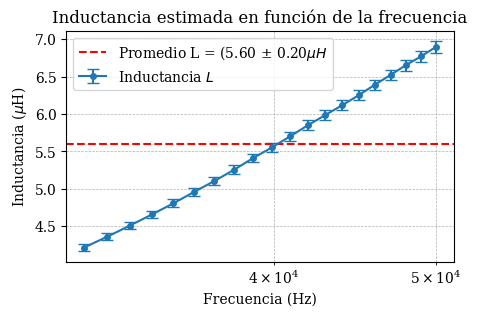

In [ ]:
L_inductiva = (Y5_inductiva * 0.559)/(X5_inductiva*2*np.pi*freq_inductiva5)

delta_Y = 0.01
delta_X = 0.01
delta_f = 25/(10**6)
delta_R = 0.0026

errorL = []

for i in range(len(L_inductiva)):
    omega = 2 * np.pi * freq_inductiva5[i]
    term1 = (Y5_inductiva[i] / (omega * X5_inductiva[i])) * delta_R
    term2 = (0.559 / (omega * X5_inductiva[i])) * (delta_Y*Y5_inductiva[i]) #termino asociado a error de Y
    term4 = (0.559 * Y5_inductiva[i] / (omega * X5_inductiva[i]**2)) * (delta_X*X5_inductiva[i])#termino asociado a error deX
    term4 = (0.559 * Y5_inductiva[i] / (2 * np.pi * freq_inductiva4[i]**2 * X5_inductiva[i])) * (delta_f*freq_inductiva5[i]+(30*(10**(-6))))#termino asociado a error de f
    errorL.append(np.sqrt(term1**2 + term2**2 + term4**2 + term4**2))

# Caso 1: Error estándar de la media (para errores aleatorios)
sigma = np.std(L_inductiva, ddof=1)  # Desviación estándar muestral
error_mean_A = sigma / np.sqrt(len(L_inductiva))

# Caso 2: Promedio de los errores individuales (para errores sistemáticos)
error_mean_B = np.mean(errorL)

error_total_media = np.sqrt(error_mean_A**2 + error_mean_B**2)
print(f"Error total: {error_total_media:.2e} H")

print(f"L promedio en la región inductiva: {np.mean(L_inductiva):.4e} H")

plt.figure(figsize=(5, 3))
plt.errorbar(freq_inductiva5, L_inductiva*10**6, yerr = np.array(errorL)*10**6, fmt = 'o-', markersize=4, capsize = 4, label=r'Inductancia $L$')
#plt.axhline(np.mean(L_inductiva), color='r', linestyle='--', label=f'Promedio L ≈ {np.mean(L_inductiva):.2e} H')
plt.axhline(np.mean(L_inductiva)*10**6, color='r', linestyle='--', label=f'Promedio L = (5.60 ± 0.20$\mu H$')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Inductancia ($\mu$H)")
plt.title("Inductancia estimada en función de la frecuencia")
plt.xscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()